In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
import sklearn

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics import tsaplots

from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Функция строит график прогнозных и реальных значений зависимой переменной

In [3]:
def graphic(prediction, title):
    plt.scatter(dates, y_test,  color='black')
    plt.plot(dates, prediction, color='blue', linewidth=3)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel('Sales')

In [4]:
#Функция подбирает наиболее подходящее значение гиперпараметра альфа, выводит прогнозные значения исследуемой переменной, коэффициенты модели
#и среднюю ошибку модели

In [5]:
def choice(model):
    alphas = 10**np.linspace(10,-10,100)
    a=1000000
    for alpha in alphas:
        models = model(alpha, normalize = True, max_iter = 10000)
        models.fit(x_train, y_train)             
        pred = models.predict(x_test)
        if a>mean_squared_error(y_test, pred):
            a=mean_squared_error(y_test, pred)
            opt_alpha=alpha

    models = model(alpha = opt_alpha, normalize = True, max_iter = 10000)
    models.fit(x_train, y_train)             
    pred = models.predict(x_test)
    print("Прогнозные значения: \n", pred)
    print("Коэффициенты: \n", models.coef_)
    print("Средняя абсолютная ошибка: ", mean_absolute_error(y_test, pred)) 
    print("Лучшая альфа: ", opt_alpha)
    return pred

In [6]:
#Функция разбивает выборку на тренировочную и тестовую

In [7]:
def spliter():
    x_train = x.loc[:30]
    x_test = x.loc[31:]
    y_train = y.loc[:30]
    y_test = y.loc[31:]
    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

In [8]:
#Функция строит линейную регрессию

In [9]:
def regr():
    reg = LinearRegression().fit(x_train, y_train)
    reg.coef_
    y_pred = reg.predict(x_test)
    return y_pred

In [10]:
#Загружаем данные

In [11]:
dat = pd.read_excel('/Users/juliashaliapina/Documents/work/Data_Shaliapina1.xlsx')

In [12]:
#В данные, помимо имеющихся в условии, были добавлены новые переменные, которые предположительно влияют на зависимую переменную. Так,
#была найдена средняя дневная температура в Дубае за неделю, указано количество праздничных нерабочих дней на неделе, введены фиктивные 
#переменные для зимы,  весны и лета (для осени нет фиктивной переменной из-за мультиколлинеарности), а также подсчитано количество
#каникулярных дней на неделе.

In [13]:
dat.head(10)

,Период продаж,"Средняя цена «ОАЭ ТУР», руб./заказ","Средняя цена конкурента, руб./заказ","Факт продаж, заказов",Количество запросов,Средняя температура днем,Количество праздничных дней,Зима,Весна,Лето,Каникулы
0,28.01.2019 - 03.02.2019,103197.80,125185.20,110.0,7366.295455,27.857143,0,1,0,0,0
1,04.02.2019 - 10.02.2019,107808.30,111489.70,91.0,12549.984848,25.142857,0,1,0,0,0
2,11.02.2019 - 17.02.2019,92518.58,98027.54,93.0,4638.037879,26.714286,0,1,0,0,0
3,18.02.2019 - 24.02.2019,80068.75,98274.79,104.0,6002.166667,25.000000,2,1,0,0,0
4,25.02.2019 - 03.03.2019,97560.45,128452.00,117.0,5456.515152,26.571429,0,1,0,0,0
5,04.03.2019 - 10.03.2019,93533.10,97903.89,71.0,5746.488095,24.714286,3,0,1,0,0
6,11.03.2019 - 17.03.2019,105465.40,111031.70,85.0,9709.583333,27.000000,0,0,1,0,0
7,18.03.2019 - 24.03.2019,103581.30,109069.90,73.0,4953.869048,27.857143,0,0,1,0,2
8,25.03.2019 - 31.03.2019,82913.93,106719.10,91.0,12880.059524,31.857143,0,0,1,0,7
9,01.04.2019 - 07.04.2019,114749.30,93182.47,47.0,5134.080000,37.857143,0,0,1,0,0


In [14]:
dat.describe()

,"Средняя цена «ОАЭ ТУР», руб./заказ","Средняя цена конкурента, руб./заказ","Факт продаж, заказов",Количество запросов,Средняя температура днем,Количество праздничных дней,Зима,Весна,Лето,Каникулы
count,52.000000,52.000000,42.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,106796.362885,105213.737115,67.952381,7713.875411,34.612637,0.500000,0.096154,0.250000,0.250000,2.519231
std,18825.467768,11076.168362,29.807474,3561.983841,6.714455,1.260252,0.297678,0.437237,0.437237,3.262925
min,69152.920000,87243.000000,22.000000,2083.931624,23.714286,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95114.002500,97996.627500,45.250000,4792.997842,27.821429,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104523.350000,103561.950000,67.500000,7462.401061,36.428571,0.000000,0.000000,0.000000,0.000000,0.000000
75%,116300.200000,110679.100000,92.500000,11240.000000,41.178571,0.000000,0.000000,0.250000,0.250000,7.000000
max,168935.100000,135743.500000,125.000000,12880.059524,43.714286,5.000000,1.000000,1.000000,1.000000,7.000000


In [15]:
#Присваиваем колонкам английские названия для удобства

In [16]:
dat.columns = ('period', 'mid_price', 'mid_price_competitor', 'qty', 'demand', 'temp', 'holiday', 'winter', 'spring', 'summer', 'children')

In [17]:
dat.tail(21)

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children
31,02.09.2019 - 08.09.2019,110644.80,102882.10,65.0,12524.973856,41.142857,0,0,0,0,0
32,09.09.2019 - 15.09.2019,94664.13,121788.30,101.0,12052.333333,40.571429,0,0,0,0,0
33,16.09.2019 - 22.09.2019,90980.85,105228.10,99.0,11579.692810,40.142857,0,0,0,0,0
34,23.09.2019 - 29.09.2019,102545.00,114407.00,103.0,9380.000000,39.142857,0,0,0,0,0
35,30.09.2019 - 06.10.2019,121821.60,129676.50,109.0,9868.000000,38.714286,0,0,0,0,0
36,07.10.2019 - 13.10.2019,145647.30,115160.80,82.0,10022.000000,38.000000,0,0,0,0,0
37,14.10.2019 - 20.10.2019,143754.80,108358.10,85.0,11935.000000,37.428571,0,0,0,0,0
38,21.10.2019 - 27.10.2019,168935.10,135743.50,88.0,11649.000000,37.000000,0,0,0,0,0
39,28.10.2019 - 03.11.2019,125785.30,121518.20,97.0,10469.000000,35.857143,2,0,0,0,6
40,04.11.2019 - 10.11.2019,103407.40,95927.21,105.0,11138.000000,32.857143,1,0,0,0,0


In [18]:
dat.head(21)

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children
0,28.01.2019 - 03.02.2019,103197.80,125185.20,110.0,7366.295455,27.857143,0,1,0,0,0
1,04.02.2019 - 10.02.2019,107808.30,111489.70,91.0,12549.984848,25.142857,0,1,0,0,0
2,11.02.2019 - 17.02.2019,92518.58,98027.54,93.0,4638.037879,26.714286,0,1,0,0,0
3,18.02.2019 - 24.02.2019,80068.75,98274.79,104.0,6002.166667,25.000000,2,1,0,0,0
4,25.02.2019 - 03.03.2019,97560.45,128452.00,117.0,5456.515152,26.571429,0,1,0,0,0
5,04.03.2019 - 10.03.2019,93533.10,97903.89,71.0,5746.488095,24.714286,3,0,1,0,0
6,11.03.2019 - 17.03.2019,105465.40,111031.70,85.0,9709.583333,27.000000,0,0,1,0,0
7,18.03.2019 - 24.03.2019,103581.30,109069.90,73.0,4953.869048,27.857143,0,0,1,0,2
8,25.03.2019 - 31.03.2019,82913.93,106719.10,91.0,12880.059524,31.857143,0,0,1,0,7
9,01.04.2019 - 07.04.2019,114749.30,93182.47,47.0,5134.080000,37.857143,0,0,1,0,0


In [19]:
#В качестве переменной спроса было взято количество запросов по словосочетанию "туры в оаэ" понедельно на wordstat. Для месяцев, для которых отсутствовала
#еженедельная информация, количество запросов за месяц было разделено по неделям на основе данных популярности запроса в Google.Trends:
#(количество запросов за месяц)*(популярность запроса на i неделе)/(сумма баллов популярности запроса за все недели в месяце)

In [20]:
#Округлили количество запросов до целых

In [21]:
dat['demand']=np.round(dat['demand'])
dat.head(10)

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children
0,28.01.2019 - 03.02.2019,103197.80,125185.20,110.0,7366.0,27.857143,0,1,0,0,0
1,04.02.2019 - 10.02.2019,107808.30,111489.70,91.0,12550.0,25.142857,0,1,0,0,0
2,11.02.2019 - 17.02.2019,92518.58,98027.54,93.0,4638.0,26.714286,0,1,0,0,0
3,18.02.2019 - 24.02.2019,80068.75,98274.79,104.0,6002.0,25.000000,2,1,0,0,0
4,25.02.2019 - 03.03.2019,97560.45,128452.00,117.0,5457.0,26.571429,0,1,0,0,0
5,04.03.2019 - 10.03.2019,93533.10,97903.89,71.0,5746.0,24.714286,3,0,1,0,0
6,11.03.2019 - 17.03.2019,105465.40,111031.70,85.0,9710.0,27.000000,0,0,1,0,0
7,18.03.2019 - 24.03.2019,103581.30,109069.90,73.0,4954.0,27.857143,0,0,1,0,2
8,25.03.2019 - 31.03.2019,82913.93,106719.10,91.0,12880.0,31.857143,0,0,1,0,7
9,01.04.2019 - 07.04.2019,114749.30,93182.47,47.0,5134.0,37.857143,0,0,1,0,0


In [22]:
x = dat['qty']
y = dat['mid_price']
y_comp = dat['mid_price_competitor']
y_dem = dat['demand']

In [23]:
#Строим графики, чтобы визуально пронаблюдать соотношения переменных
#Из графиков видно, что данные количество заказов-цена сильно зашумлены, и сразу сложно выделить какой-либо паттерн. В то же время
# наблюдается прямая зависимость между количеством заказов и ценой конкурента, а также рыночным спросом.

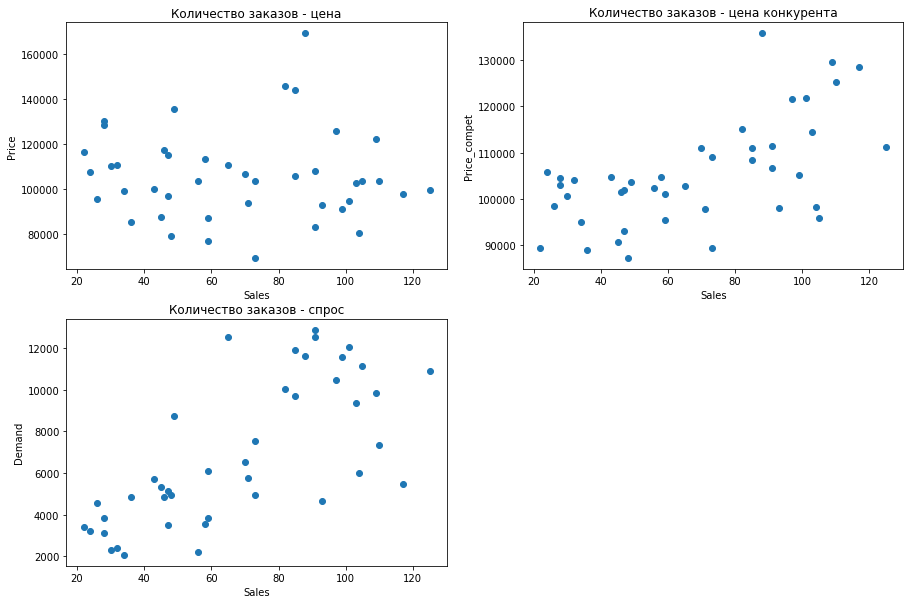

In [24]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221)
ax.title.set_text('Количество заказов - цена')
ax.set_xlabel('Sales')
ax.set_ylabel('Price')
ax.plot(x,y,'o')
ax2 = f.add_subplot(222)
ax2.title.set_text('Количество заказов - цена конкурента')
ax2.set_xlabel('Sales')
ax2.set_ylabel('Price_compet')
ax2.plot(x,y_comp,'o')
ax3 = f.add_subplot(223)
ax3.title.set_text('Количество заказов - спрос')
ax3.set_xlabel('Sales')
ax3.set_ylabel('Demand')
ax3.plot(x,y_dem,'o')

In [25]:
#Ограничиваем выборку теми данными, которые нам известны

In [26]:
y = dat.loc[:41,'qty']
x = dat.loc[:41,['mid_price', 'mid_price_competitor', 'demand']]
x.head()

,mid_price,mid_price_competitor,demand
0,103197.80,125185.20,7366.0
1,107808.30,111489.70,12550.0
2,92518.58,98027.54,4638.0
3,80068.75,98274.79,6002.0
4,97560.45,128452.00,5457.0


In [27]:
#Строим временной ряд, отражающий количество продаж по времени

In [28]:
week = [i for i in range(0,42)]

Text(0, 0.5, 'Sales')

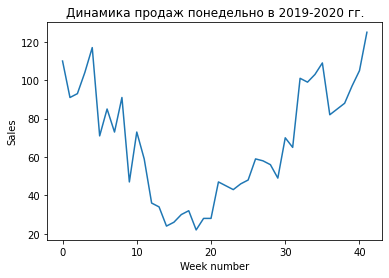

In [29]:
plt.plot(week, y)
plt.title('Динамика продаж понедельно в 2019-2020 гг.')
plt.xlabel('Week number')
plt.ylabel('Sales')

In [30]:
#Разделяем выборку на обучающую и тестовую

In [31]:
x_train = x.loc[:30]
x_test = x.loc[31:]
y_train = y.loc[:30]
y_test = y.loc[31:]
y_test=y_test.to_frame()
y_train=y_train.to_frame()

In [32]:
#Строим линейную регрессию. Нашей задачей является выявление взаимосвязи цены, продаж и спроса. С этой задачей лучше всего справляется регрессия, коэффициенты которой как раз и указывают на эту связь.

In [33]:
y_pred = regr()
y_pred

array([[ 76.83778328],
       [120.35514479],
       [ 93.47906683],
       [ 91.91315317],
       [103.96568195],
       [ 60.41463307],
       [ 57.14443963],
       [ 82.28631718],
       [ 88.97769539],
       [ 65.96864675],
       [ 94.51049793]])

In [34]:
#Обучив модель на обучающей выборке, теперь строим прогноз для тестовой выборки и сравниваем получившиеся значения с действительными

In [35]:
comp = pd.DataFrame(np.column_stack([y_test, y_pred]), dtype=int)
comp.columns = ['real_y', 'predicted_y']
print(comp)

    real_y  predicted_y
0       65           76
1      101          120
2       99           93
3      103           91
4      109          103
5       82           60
6       85           57
7       88           82
8       97           88
9      105           65
10     125           94


In [36]:
dates = dat.loc[31:41, 'period']

In [37]:
#Строим график, чтобы сравнить реальные и прогнозные значения

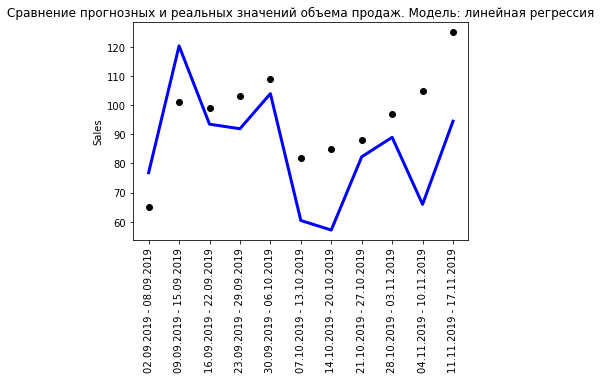

In [38]:
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: линейная регрессия')

In [39]:
#Находим среднюю абсолютную и среднюю квадратическую ошибку. Первая свидетельствует о том, что проноз отклоняется от реальности в среднем на 17 заказов.
#В отличии от средней абсолютной, среднеквадратическая ошибка сильнее штрафует модель за выбросы в прогнозе.

In [40]:
mean_absolute_error(y_test, y_pred)

16.866617833768192

In [41]:
mean_squared_error(y_test, y_pred)

407.76528194108874

In [42]:
#К выборке были добавлены новые наблюдения: сезоны(winter, spring, summer), праздничные дни (holiday) и детские каникулы (children).

In [43]:
#Дополнительные переменные ухудшали прогноз, за исключением детских каникул, ее было решено оставить в модели.

In [44]:
x = dat.loc[:41,['mid_price', 'mid_price_competitor', 'demand', 'children']]

In [45]:
#Снова строим модель и делаем прогноз, но в этот раз включаем переменную 'children'.

In [46]:
x_train = x.loc[:30]
x_test = x.loc[31:]
y_train = y.loc[:30]
y_test = y.loc[31:]
y_test=y_test.to_frame()
y_train=y_train.to_frame()

In [47]:
y_pred = regr()

In [48]:
comp = pd.DataFrame(np.column_stack([y_test, y_pred]), dtype=int)
comp.columns = ['real_y', 'predicted_y']
print(comp)

    real_y  predicted_y
0       65           80
1      101          121
2       99           95
3      103           94
4      109          106
5       82           66
6       85           63
7       88           88
8       97           87
9      105           70
10     125           96


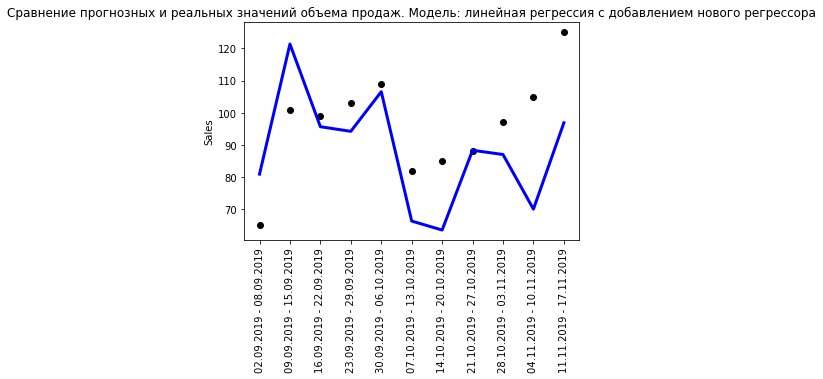

In [49]:
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: линейная регрессия с добавлением нового регрессора')

In [50]:
#Как видно по графику и метрикам качества, описательная сила модели увеличилась. 
#Кроме того, снизилась средняя абсолютная ошибка: сейчас она равна 14,7. В том числе снизилась и среднеквадратическая ошибка.

In [51]:
mean_absolute_error(y_test, y_pred)

14.65895531732354

In [52]:
mean_squared_error(y_test, y_pred)

325.0351198906785

In [53]:
#Возможно, решение о покупке принимается сильно после того, как производится поиск тура в интернете. 
#Поэтому имеет смысл добавить лаги к переменной demand.

In [54]:
dat = pd.concat([dat, dat['demand'].shift()], axis=1)


In [55]:
dat.columns = ('period', 'mid_price', 'mid_price_competitor', 'qty', 'demand', 'temp', 'holiday', 'winter', 'spring', 'summer', 'children', 'demand_1')

In [56]:
dat = pd.concat([dat, dat['demand'].shift(2)], axis=1)
dat.columns = ('period', 'mid_price', 'mid_price_competitor', 'qty', 'demand', 'temp', 'holiday', 'winter', 'spring', 'summer', 'children', 'demand_1', 'demand_2')

In [57]:
data = dat
dat = dat.dropna()
dat.head(10)

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children,demand_1,demand_2
2,11.02.2019 - 17.02.2019,92518.58,98027.54,93.0,4638.0,26.714286,0,1,0,0,0,12550.0,7366.0
3,18.02.2019 - 24.02.2019,80068.75,98274.79,104.0,6002.0,25.000000,2,1,0,0,0,4638.0,12550.0
4,25.02.2019 - 03.03.2019,97560.45,128452.00,117.0,5457.0,26.571429,0,1,0,0,0,6002.0,4638.0
5,04.03.2019 - 10.03.2019,93533.10,97903.89,71.0,5746.0,24.714286,3,0,1,0,0,5457.0,6002.0
6,11.03.2019 - 17.03.2019,105465.40,111031.70,85.0,9710.0,27.000000,0,0,1,0,0,5746.0,5457.0
7,18.03.2019 - 24.03.2019,103581.30,109069.90,73.0,4954.0,27.857143,0,0,1,0,2,9710.0,5746.0
8,25.03.2019 - 31.03.2019,82913.93,106719.10,91.0,12880.0,31.857143,0,0,1,0,7,4954.0,9710.0
9,01.04.2019 - 07.04.2019,114749.30,93182.47,47.0,5134.0,37.857143,0,0,1,0,0,12880.0,4954.0
10,08.04.2019 - 14.04.2019,69152.92,89318.94,73.0,7559.0,32.285714,0,0,1,0,0,5134.0,12880.0
11,15.04.2019 - 21.04.2019,76651.25,101019.40,59.0,3851.0,35.142857,0,0,1,0,0,7559.0,5134.0


In [58]:
dat.head(10)

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children,demand_1,demand_2
2,11.02.2019 - 17.02.2019,92518.58,98027.54,93.0,4638.0,26.714286,0,1,0,0,0,12550.0,7366.0
3,18.02.2019 - 24.02.2019,80068.75,98274.79,104.0,6002.0,25.000000,2,1,0,0,0,4638.0,12550.0
4,25.02.2019 - 03.03.2019,97560.45,128452.00,117.0,5457.0,26.571429,0,1,0,0,0,6002.0,4638.0
5,04.03.2019 - 10.03.2019,93533.10,97903.89,71.0,5746.0,24.714286,3,0,1,0,0,5457.0,6002.0
6,11.03.2019 - 17.03.2019,105465.40,111031.70,85.0,9710.0,27.000000,0,0,1,0,0,5746.0,5457.0
7,18.03.2019 - 24.03.2019,103581.30,109069.90,73.0,4954.0,27.857143,0,0,1,0,2,9710.0,5746.0
8,25.03.2019 - 31.03.2019,82913.93,106719.10,91.0,12880.0,31.857143,0,0,1,0,7,4954.0,9710.0
9,01.04.2019 - 07.04.2019,114749.30,93182.47,47.0,5134.0,37.857143,0,0,1,0,0,12880.0,4954.0
10,08.04.2019 - 14.04.2019,69152.92,89318.94,73.0,7559.0,32.285714,0,0,1,0,0,5134.0,12880.0
11,15.04.2019 - 21.04.2019,76651.25,101019.40,59.0,3851.0,35.142857,0,0,1,0,0,7559.0,5134.0


In [59]:
x = dat.loc[:41,['mid_price', 'mid_price_competitor', 'demand_2', 'children', 'holiday']]
y = dat.loc[:41,'qty']

In [60]:
#Повторно оцениваем модель, но в данном случае зависимой переменной выступает второй лаг количества продаж. 
#Ранее дополнительно была произведена оценка с первым лагом, но не включена в данный код в целях экономии объема. 
#Проверка на второй лаг проводится по аналогии с первым. Второй лаг показал бОльшую эффективность.

In [61]:
x_train = x.loc[:30]
x_test = x.loc[31:]
y_train = y.loc[:30]
y_test = y.loc[31:]
y_test=y_test.to_frame()
y_train=y_train.to_frame()

In [62]:
y_pred = regr()

In [63]:
comp = pd.DataFrame(np.column_stack([y_test, y_pred]), dtype=int)
comp.columns = ['real_y', 'predicted_y']
print(comp)

    real_y  predicted_y
0       65           74
1      101          105
2       99          105
3      103          115
4      109          132
5       82           84
6       85           75
7       88          115
8       97          108
9      105           76
10     125          103


In [64]:
#Строим график линейной регрессии со вторым лагом переменной demand

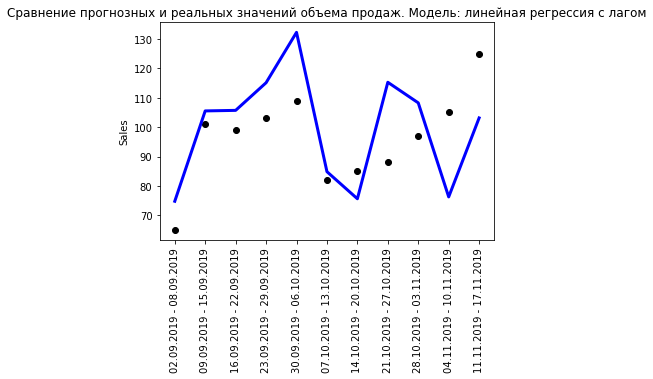

In [65]:
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: линейная регрессия с лагом')

In [66]:
#Обе метрики качества модели показывают ее улучшение. Теперь среднее квадратическое отклонение равно 14,3. 
#Был выбран второй лаг, поскольку первый лаг не дал таких существенных результатов.
#Значит, решение о покупке принимается с интервалом в 2 недели после запроса в интернете.

In [67]:
mean_absolute_error(y_test, y_pred)

14.34268394936774

In [68]:
mean_squared_error(y_test, y_pred)

283.54310299107567

In [69]:
#В модели возможны существенные проблемы, возникающие из-за переобучения. Чтобы предотвратить подобные последствия, предлагается
#использовать регуляризацию. Начнем с L2 регуляризации, штрафующей за большие коэффициенты. Как видно, модель достаточно хорошо предсказывает
#первые значения. Средняя абсолютная ошибка уже снизилась до 10,5.

Прогнозные значения: 
 [[ 72.19592695]
 [ 96.82717283]
 [ 97.81291817]
 [104.9270375 ]
 [117.99045841]
 [ 79.33843979]
 [ 72.10981965]
 [103.00439534]
 [ 96.43669695]
 [ 73.62786043]
 [ 95.27871858]]
Коэффициенты: 
 [[-3.74213430e-04  1.45001392e-03  3.94916119e-03 -7.44135673e-01
  -2.58899065e+00]]
Средняя абсолютная ошибка:  10.516926526751394
Лучшая альфа:  0.19630406500402683


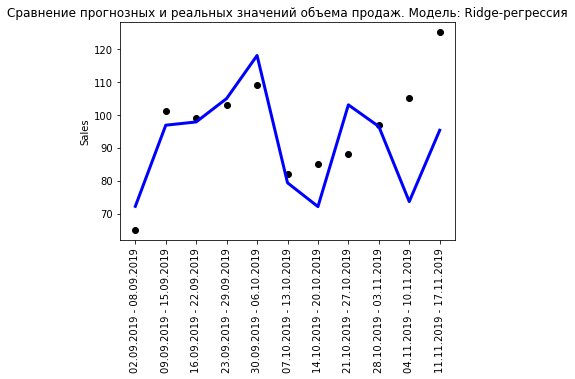

In [70]:
y_pred = choice(Ridge)
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: Ridge-регрессия')

In [71]:
comp = pd.DataFrame(np.column_stack([y_test, y_pred]), dtype=int)
comp.columns = ['real_y', 'predicted_y']
print(comp)

    real_y  predicted_y
0       65           72
1      101           96
2       99           97
3      103          104
4      109          117
5       82           79
6       85           72
7       88          103
8       97           96
9      105           73
10     125           95


In [72]:
#Далее проводим L1 регуляризацию, обнуляющую коэффициенты при лишних переменных, тем самым упрощая модель и снижая зашумленность. 
#Из результатов видно, что L2 регуляризация продемонстрировала себя лучше всех прочих моделей.

In [73]:
#Коэффициенты ридж-регрессии указывают на то, что при росте цены на услуги компании количество продаж снижается, 
#а при росте цены конкурентов и рыночного спроса, напротив, увеличивается. Это согласуется и с экономической логикой.

Прогнозные значения: 
 [ 70.9204948   96.5870511   98.69497959 106.86503829 121.85940554
  80.38771275  72.52829417 107.33187048 107.07271383  74.54155957
  95.90814172]
Коэффициенты: 
 [-3.62852486e-04  1.57920217e-03  4.50147883e-03 -6.10075573e-03
 -1.01313436e+00]
Средняя абсолютная ошибка:  11.854707640469035
Лучшая альфа:  0.31257158496882353


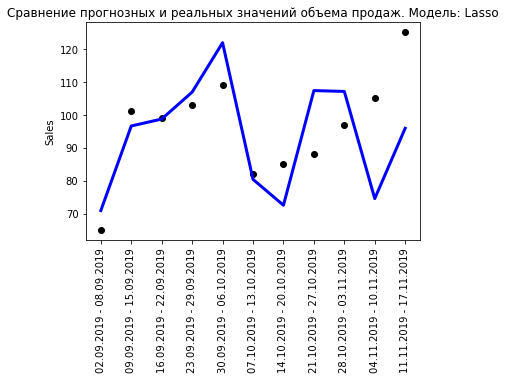

In [74]:
y_pred = choice(model=Lasso)
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: Lasso')

In [75]:
comp = pd.DataFrame(np.column_stack([y_test, y_pred]), dtype=int)
comp.columns = ['real_y', 'predicted_y']
print(comp)

    real_y  predicted_y
0       65           70
1      101           96
2       99           98
3      103          106
4      109          121
5       82           80
6       85           72
7       88          107
8       97          107
9      105           74
10     125           95


In [76]:
x_pred = data.loc[42:,['mid_price', 'mid_price_competitor', 'demand_2', 'children', 'holiday']]
data.tail(15)

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children,demand_1,demand_2
37,14.10.2019 - 20.10.2019,143754.80,108358.10,85.0,11935.0,37.428571,0,0,0,0,0,10022.0,9868.0
38,21.10.2019 - 27.10.2019,168935.10,135743.50,88.0,11649.0,37.000000,0,0,0,0,0,11935.0,10022.0
39,28.10.2019 - 03.11.2019,125785.30,121518.20,97.0,10469.0,35.857143,2,0,0,0,6,11649.0,11935.0
40,04.11.2019 - 10.11.2019,103407.40,95927.21,105.0,11138.0,32.857143,1,0,0,0,0,10469.0,11649.0
41,11.11.2019 - 17.11.2019,99600.50,111304.50,125.0,10929.0,30.000000,0,0,0,0,0,11138.0,10469.0
42,18.11.2019 - 24.11.2019,106651.70,96013.79,NaN,10475.0,27.714286,0,0,0,0,0,10929.0,11138.0
43,25.11.2019 - 01.12.2019,101673.50,102984.40,NaN,9432.0,29.000000,0,0,0,0,0,10475.0,10929.0
44,02.12.2019 - 08.12.2019,123099.70,103358.10,NaN,10360.0,28.857143,0,0,0,0,0,9432.0,10475.0
45,09.12.2019 - 15.12.2019,119102.70,125948.50,NaN,11165.0,27.714286,0,0,0,0,0,10360.0,9432.0
46,16.12.2019 - 22.12.2019,101896.10,91143.04,NaN,11716.0,27.571429,0,0,0,0,0,11165.0,10360.0


In [77]:
#Возможно, с некоторыми переменными наблюдается нелинейная зависимость, поэтому вводим квадраты переменных. 
#По графику 'Продажи-Цена конкурента' можно предположить, что присутствует квадратичная зависимость.

In [78]:
dat.loc[:,'mid_price_competitor_sq'] = dat.loc[:,'mid_price_competitor']**2

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [79]:
dat.head()

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children,demand_1,demand_2,mid_price_competitor_sq
2,11.02.2019 - 17.02.2019,92518.58,98027.54,93.0,4638.0,26.714286,0,1,0,0,0,12550.0,7366.0,9.609399e+09
3,18.02.2019 - 24.02.2019,80068.75,98274.79,104.0,6002.0,25.000000,2,1,0,0,0,4638.0,12550.0,9.657934e+09
4,25.02.2019 - 03.03.2019,97560.45,128452.00,117.0,5457.0,26.571429,0,1,0,0,0,6002.0,4638.0,1.649992e+10
5,04.03.2019 - 10.03.2019,93533.10,97903.89,71.0,5746.0,24.714286,3,0,1,0,0,5457.0,6002.0,9.585172e+09
6,11.03.2019 - 17.03.2019,105465.40,111031.70,85.0,9710.0,27.000000,0,0,1,0,0,5746.0,5457.0,1.232804e+10


In [80]:
#Поскольку нам не известно количество запросов понедельно за период с 11.02.2019 по 22.09.2019, попоробуем спрогнозировать эти значения

In [81]:
xl = pd.ExcelFile('/Users/juliashaliapina/Documents/work/Data_shaliapina1.xlsx')

In [82]:
df = pd.read_excel(xl, 'Data for demand')

In [83]:
#В качестве признаков были взяты бинарные переменные, отвечающие за периоды до и во время коронавируса. 
#Коронавирус здесь считается тогда, когда закрыто авиасообщение с оаэ
#Другие переменные - сезон, количество праздничных дней, каникулярных дней и оценка популярности запроса в Google Trends

In [84]:
df.head()

,period,demands,before_corona,corona,winter,spring,summer,holiday,children,trends
0,30.09.2019 - 06.10.2019,9868,1,0,0,0,0,0,0,32
1,07.10.2019 - 13.10.2019,10022,1,0,0,0,0,0,0,77
2,14.10.2019 - 20.10.2019,11935,1,0,0,0,0,0,0,59
3,21.10.2019 - 27.10.2019,11649,1,0,0,0,0,0,7,55
4,28.10.2019 - 03.11.2019,10469,1,0,0,0,0,2,0,91


In [85]:
#Построили корреляционную матрицу для подбора значимых переменных

In [86]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,demands,before_corona,corona,winter,spring,summer,holiday,children,trends
demands,1.000000,0.906633,-0.920682,0.623283,-0.423013,-0.627113,0.119881,-0.392232,0.866065
before_corona,0.906633,1.000000,-0.856945,0.600000,-0.288889,-0.555556,0.118299,-0.342456,0.846282
corona,-0.920682,-0.856945,1.000000,-0.514167,0.380037,0.648298,-0.046568,0.441352,-0.815202
winter,0.623283,0.600000,-0.514167,1.000000,-0.333333,-0.333333,0.154303,-0.116903,0.616133
spring,-0.423013,-0.288889,0.380037,-0.333333,1.000000,-0.333333,0.154303,-0.309448,-0.379637
summer,-0.627113,-0.555556,0.648298,-0.333333,-0.333333,1.000000,-0.154303,0.722046,-0.489465
holiday,0.119881,0.118299,-0.046568,0.154303,0.154303,-0.154303,1.000000,-0.033822,0.171755
children,-0.392232,-0.342456,0.441352,-0.116903,-0.309448,0.722046,-0.033822,1.000000,-0.309975
trends,0.866065,0.846282,-0.815202,0.616133,-0.379637,-0.489465,0.171755,-0.309975,1.000000


In [87]:
df.columns

Index(['period', 'demands', 'before_corona', 'corona', 'winter', 'spring',
       'summer', 'holiday', 'children', 'trends'],
      dtype='object')

In [88]:
for i in range(len(df['period'])):
    df.loc[i, 'time'] = i

In [89]:
x = df.loc[:, ['before_corona', 'corona', 'summer', 'spring', 'children', 'trends']]
y = df.loc[:, 'demands']

In [90]:
#Для начала попробовали сделать проноз на основе линейной регрессии

In [91]:
lm = LinearRegression()

In [92]:
k_fold = KFold(5, shuffle=True, random_state=1)

In [93]:
scores = cross_val_score(lm, x, y, cv=k_fold, scoring='neg_median_absolute_error')
#print(scores)
print(np.mean(scores))

-687.0372412982191


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 <a list of 52 Text major ticklabel objects>)

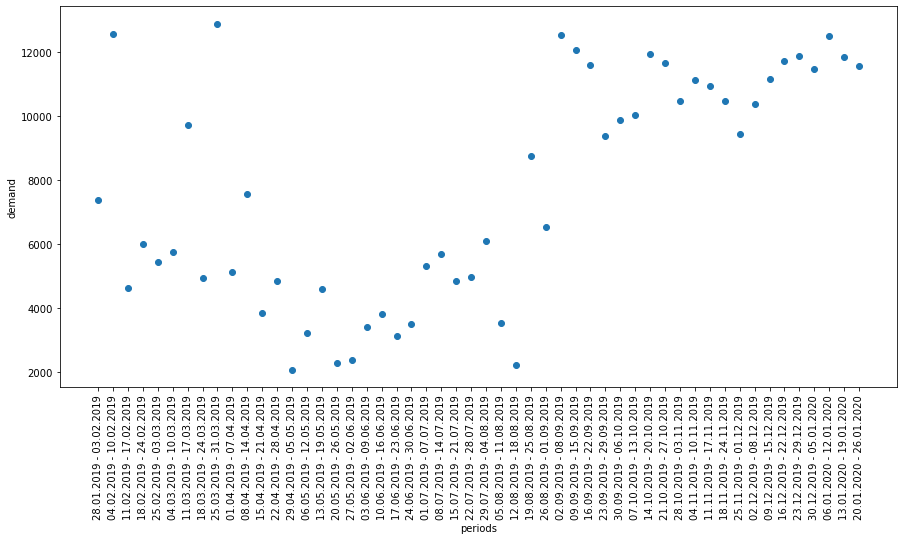

In [94]:
plt.figure(figsize=(15,7))
plt.plot(data['period'], data['demand'], 'o')
plt.xlabel(xlabel = 'periods')
plt.ylabel(ylabel = 'demand')
plt.xticks(rotation=90)


In [95]:
#Далее опробовали kNN. Spoiler:  модель ухудшилась

In [96]:
x = df.loc[:, ['before_corona', 'corona', 'summer', 'spring', 'children', 'trends', 'time']]
y = df.loc[:, 'demands']

In [97]:
x_train = x.loc[:40]
y_train = y.loc[:40]
x_test = x.loc[41:]
y_test = y.loc[41:]

In [98]:
neigh = KNeighborsRegressor().fit(x_train, y_train)

In [99]:
y_pred = neigh.predict(x_test)
y_pred

array([2783. , 2783. , 2783. , 2783. , 2783. , 2791.6, 2460.6, 6468.8,
       2783. , 3149.8, 2791.6])

In [100]:
y_test

41    2201
42    1777
43    1988
44    1678
45    1507
46    1662
47    2221
48    6752
49    6869
50    7128
51    6330
Name: demands, dtype: int64

In [101]:
mean_absolute_error(y_pred, y_test)

1638.090909090909

In [102]:
scores = cross_val_score(neigh, x, y, cv=k_fold, scoring='neg_median_absolute_error')
#print(scores)
print(np.mean(scores))

-989.7800000000001


In [103]:
#kNN дает бОльшую ошибку, тогда останавливаемся на линейной регрессии. Проведем регуляризацию

In [104]:
x = df.loc[:, ['before_corona', 'corona', 'summer', 'spring', 'holiday']]
y = df.loc[:, 'demands']

In [105]:
x_test = x.iloc[:10]
y_test = y.iloc[:10]
y_train = y.iloc[10:]
x_train = x.iloc[10:]

In [106]:
lm = Ridge()
mode = lm.fit(x_train, y_train)
y_pred = mode.predict(x_test)
mean_absolute_error(y_test, y_pred)

671.7602654490356

In [107]:
lm = Lasso()

In [108]:
mode = lm.fit(x_train, y_train)

In [109]:
y_pred = mode.predict(x_test)

In [110]:
mean_absolute_error(y_test, y_pred)

652.4070326068953

In [111]:
#Очевидно, лучшую описательную способность продемонстрировала линейная регрессия с L1-регуляризацией. 
#На ее основе и будем осуществлять прогноз количества запросов по неделям.

In [112]:
data.head()

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children,demand_1,demand_2
0,28.01.2019 - 03.02.2019,103197.80,125185.20,110.0,7366.0,27.857143,0,1,0,0,0,NaN,NaN
1,04.02.2019 - 10.02.2019,107808.30,111489.70,91.0,12550.0,25.142857,0,1,0,0,0,7366.0,NaN
2,11.02.2019 - 17.02.2019,92518.58,98027.54,93.0,4638.0,26.714286,0,1,0,0,0,12550.0,7366.0
3,18.02.2019 - 24.02.2019,80068.75,98274.79,104.0,6002.0,25.000000,2,1,0,0,0,4638.0,12550.0
4,25.02.2019 - 03.03.2019,97560.45,128452.00,117.0,5457.0,26.571429,0,1,0,0,0,6002.0,4638.0


In [113]:
#Переносим признак, отвечающий за коронавирус, в основную таблицу

In [114]:
for i in range(len(data['period'])):
    data.loc[i,'corona'] = 0
    data.loc[i,'before_corona'] = 1

In [115]:
#Продажи можно представить в виде временного ряда. 
#Попробуем модель ARIMA, возможно, она позволит точнее предсказывать значения переменной qty. Spoiler: ARIMA оказалась хуже, чем ols

In [116]:
#DataFrame преобразуем во временной ряд

In [117]:
for i in range(len(data['period'])):
    data.loc[i, 'period'] = data.loc[i, 'period'][:10]

In [118]:
datum = data.loc[:, ['period', 'qty']].dropna()

In [119]:
datum['period'] = pd.to_datetime(datum['period'], format = "%d.%m.%Y")


In [120]:
datum.index = pd.to_datetime(datum['period'])
del datum['period']
pd.Series(datum['qty'])

period
2019-01-28    110.0
2019-02-04     91.0
2019-02-11     93.0
2019-02-18    104.0
2019-02-25    117.0
2019-03-04     71.0
2019-03-11     85.0
2019-03-18     73.0
2019-03-25     91.0
2019-04-01     47.0
2019-04-08     73.0
2019-04-15     59.0
2019-04-22     36.0
2019-04-29     34.0
2019-05-06     24.0
2019-05-13     26.0
2019-05-20     30.0
2019-05-27     32.0
2019-06-03     22.0
2019-06-10     28.0
2019-06-17     28.0
2019-06-24     47.0
2019-07-01     45.0
2019-07-08     43.0
2019-07-15     46.0
2019-07-22     48.0
2019-07-29     59.0
2019-08-05     58.0
2019-08-12     56.0
2019-08-19     49.0
2019-08-26     70.0
2019-09-02     65.0
2019-09-09    101.0
2019-09-16     99.0
2019-09-23    103.0
2019-09-30    109.0
2019-10-07     82.0
2019-10-14     85.0
2019-10-21     88.0
2019-10-28     97.0
2019-11-04    105.0
2019-11-11    125.0
Name: qty, dtype: float64

In [121]:
#Построим график временного ряда

Text(0.5, 1.0, 'Временной ряд - продажи')

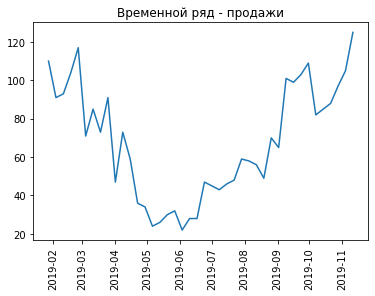

In [122]:
plt.plot(datum)
plt.xticks(rotation=90)
plt.title('Временной ряд - продажи')

In [123]:
#Проводим тест Дики-Фуллера на стационарность ряда

In [124]:
test = adfuller(datum)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -1.5699692054467613
p-value:  0.4986590815175815
Critical values:  {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}
есть единичные корни, ряд не стационарен


In [125]:
#Возможно, первая разность окажется стационарной

In [126]:
datumdiff = datum.diff(periods=1).dropna()

In [127]:
test = adfuller(datumdiff)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -9.239187154419534
p-value:  1.599652850856746e-15
Critical values:  {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}
единичных корней нет, ряд стационарен


In [128]:
#Построим временной ряд первых разностей

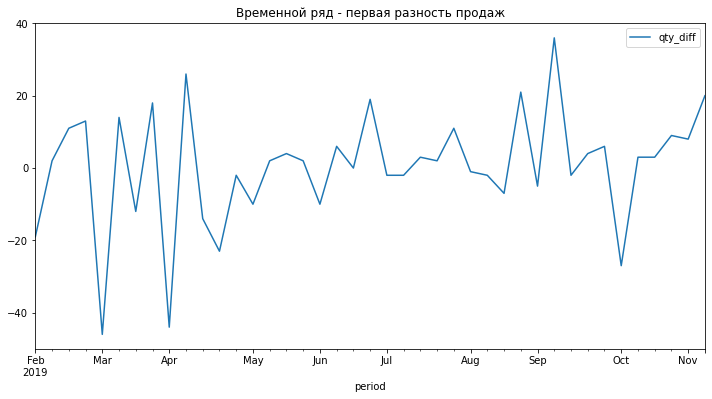

In [129]:
datumdiff.plot(figsize=(12,6))
plt.title('Временной ряд - первая разность продаж')
plt.legend(['qty_diff'])

In [130]:
y = datumdiff['qty']

In [131]:
#Строим графики автокорреляции и частичной автокорреляции

In [132]:
def show_acf_pacf(y, lags_number=20):
    #f = plt.figure(figsize=(20,5))
    #ax = f.add_subplot(221)
    plt.figure(figsize=(20, 5))
    plt.plot(datum)
    plt.show()
    plt.figure(figsize=(20, 5))
    ax1=plt.subplot(1,2,1)
    tsaplots.plot_acf(y, ax=ax1);
    ax1.set_xlim(0, lags_number);
    ax1.set_ylim(-0.7, 0.7);
    ax2=plt.subplot(1,2,2)
    tsaplots.plot_pacf(y, ax=ax2);
    ax2.set_xlim(0, lags_number);
    ax2.set_ylim(-0.7, 0.7);


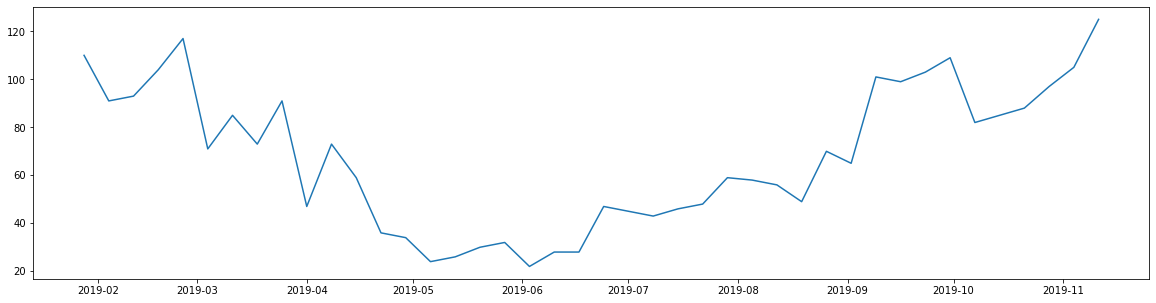

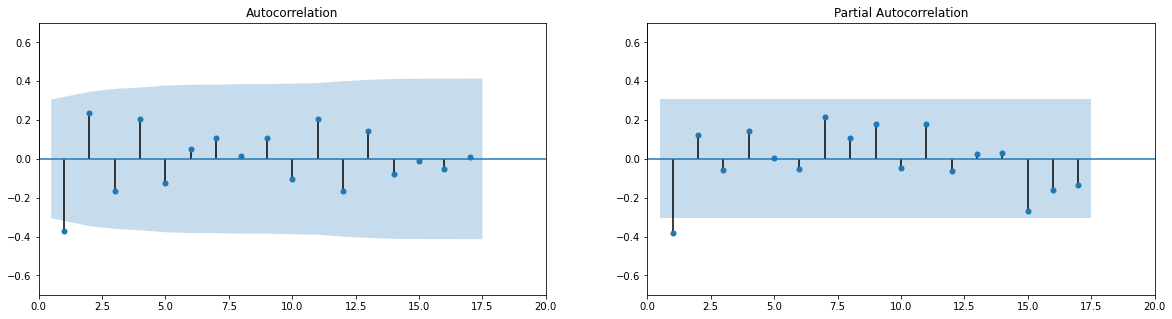

In [133]:
show_acf_pacf(y, lags_number=20)

In [134]:
#В результате анализа коррелограммы PACF делаем вывод, что p = 1, т.к. на ней только 1 лаг сильно отстает от нуля.
#По коррелограмме ACF видим, что q = 1, т.к. после лага 1 значении функций резко снижаются.

In [135]:
#Строим ARIMA(1,1)

In [136]:
src_data_model = datum[:'2019-09-09']
model = ARIMA(src_data_model, order=(1,1,1)).fit(full_output=False, disp=0)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


In [137]:
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.qty   No. Observations:                   32
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -132.289
Method:                       css-mle   S.D. of innovations             15.024
Date:                Tue, 06 Oct 2020   AIC                            272.577
Time:                        11:51:05   BIC                            278.440
Sample:                    02-04-2019   HQIC                           274.521
                         - 09-09-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4249      2.117     -0.201      0.841      -4.574       3.724
ar.L1.D.qty    -0.7792      0.271     -2.874      0.004      -1.311      -0.248
ma.L1.D.qty     0.4109      0.417      0.987    

In [138]:
#Все коэффициенты модели оказались незначимы на уровне значимости 0,05. ARIMA в данном случае неприменима.

In [139]:
data.head()

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children,demand_1,demand_2,corona,before_corona
0,28.01.2019,103197.80,125185.20,110.0,7366.0,27.857143,0,1,0,0,0,NaN,NaN,0.0,1.0
1,04.02.2019,107808.30,111489.70,91.0,12550.0,25.142857,0,1,0,0,0,7366.0,NaN,0.0,1.0
2,11.02.2019,92518.58,98027.54,93.0,4638.0,26.714286,0,1,0,0,0,12550.0,7366.0,0.0,1.0
3,18.02.2019,80068.75,98274.79,104.0,6002.0,25.000000,2,1,0,0,0,4638.0,12550.0,0.0,1.0
4,25.02.2019,97560.45,128452.00,117.0,5457.0,26.571429,0,1,0,0,0,6002.0,4638.0,0.0,1.0


In [140]:
#Значит, останавливаем свой выбор на линейной регрессии.

In [141]:
x_pred = data.loc[:34, ['before_corona', 'corona', 'summer', 'spring', 'holiday']]
y_other = data.loc[:34, 'demand']

In [142]:
y_pred = mode.predict(x_pred)

In [143]:
y_pred

array([10652.75424191, 10652.75424191, 10652.75424191, 11039.8779264 ,
       10652.75424191,  7126.44896938,  6545.76344265,  6545.76344265,
        6545.76344265,  6545.76344265,  6545.76344265,  6545.76344265,
        6545.76344265,  7513.57265386,  7320.01081162,  6545.76344265,
        6545.76344265,  6545.76344265,  6185.28937645,  6378.8512187 ,
        6185.28937645,  6185.28937645,  6185.28937645,  6185.28937645,
        6185.28937645,  6185.28937645,  6185.28937645,  6185.28937645,
        6185.28937645,  6185.28937645,  6185.28937645, 10652.75424191,
       10652.75424191, 10652.75424191, 10652.75424191])

In [144]:
for i in range(len(y_other)):
    data.loc[i, 'demand'] = y_pred[i]

In [145]:
data['demand_1'] = data['demand'].shift()
data['demand_2'] = data['demand_1'].shift()
dom = data

In [146]:
for i in range(len(data['mid_price_competitor'])):
    data.loc[i, 'comp_sq'] = data.loc[i, 'mid_price_competitor']**2

In [147]:
data = data.dropna()

In [148]:
corr = data.iloc[:, :11].corr()
corr.style.background_gradient(cmap='coolwarm')

,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children
mid_price,1.000000,0.528144,-0.035342,0.257918,0.293626,-0.060479,-0.221305,-0.320833,0.064683,0.064584
mid_price_competitor,0.528144,1.000000,0.569133,0.543020,-0.079126,-0.103270,0.090823,-0.286617,-0.294441,-0.221971
qty,-0.035342,0.569133,1.000000,0.773056,-0.498571,-0.135345,0.374348,-0.331673,-0.481747,-0.471581
demand,0.257918,0.543020,0.773056,1.000000,-0.330167,0.054427,0.379885,-0.412293,-0.585180,-0.615447
temp,0.293626,-0.079126,-0.498571,-0.330167,1.000000,-0.250489,-0.541641,-0.404011,0.668903,0.612168
holiday,-0.060479,-0.103270,-0.135345,0.054427,-0.250489,1.000000,0.054162,0.288183,-0.227266,-0.216629
winter,-0.221305,0.090823,0.374348,0.379885,-0.541641,0.054162,1.000000,-0.197583,-0.197583,-0.246727
spring,-0.320833,-0.286617,-0.331673,-0.412293,-0.404011,0.288183,-0.197583,1.000000,-0.481481,-0.295592
summer,0.064683,-0.294441,-0.481747,-0.585180,0.668903,-0.227266,-0.197583,-0.481481,1.000000,0.846559
children,0.064584,-0.221971,-0.471581,-0.615447,0.612168,-0.216629,-0.246727,-0.295592,0.846559,1.000000


In [149]:
#Попробуем kNN. Spoiler:  модель ухудшилась

In [150]:
y = data.loc[:41,'qty']
x = data.loc[:41,['mid_price', 'mid_price_competitor', 'comp_sq','demand']]
x

,mid_price,mid_price_competitor,comp_sq,demand
2,92518.58,98027.54,9.609399e+09,10652.754242
3,80068.75,98274.79,9.657934e+09,11039.877926
4,97560.45,128452.00,1.649992e+10,10652.754242
5,93533.10,97903.89,9.585172e+09,7126.448969
6,105465.40,111031.70,1.232804e+10,6545.763443
7,103581.30,109069.90,1.189624e+10,6545.763443
8,82913.93,106719.10,1.138897e+10,6545.763443
9,114749.30,93182.47,8.682973e+09,6545.763443
10,69152.92,89318.94,7.977873e+09,6545.763443
11,76651.25,101019.40,1.020492e+10,6545.763443


In [151]:
x_train = x.loc[:30]
x_test = x.loc[31:]
y_train = y.loc[:30]
y_test = y.loc[31:]
y_test=y_test.to_frame()
y_train=y_train.to_frame()

In [152]:
lm = KNeighborsRegressor()
mod = lm.fit(x_train, y_train)
y_pred = mod.predict(x_test)

In [153]:
dates = dat.loc[31:41, 'period']

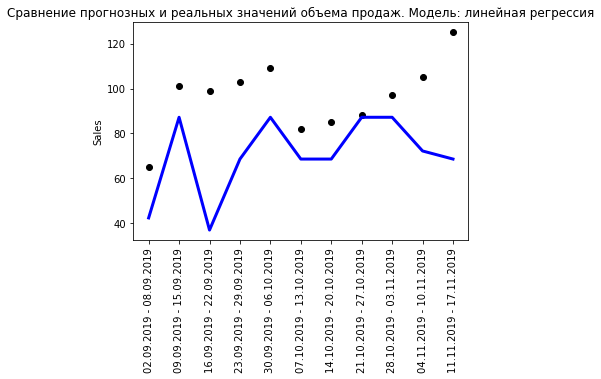

In [154]:
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: линейная регрессия')

In [155]:
mean_absolute_error(y_test, y_pred)

25.83636363636364

In [156]:
#kNN дает очень большую ошибку, эта модель не подходит. Вернемся к линейной регшрессии

In [157]:
y = data.loc[2:41,'qty']
x = data.loc[2:41,['mid_price', 'mid_price_competitor', 'comp_sq','demand', 'demand_1', 'demand_2', 'spring', 'holiday']]
x.head()

,mid_price,mid_price_competitor,comp_sq,demand,demand_1,demand_2,spring,holiday
2,92518.58,98027.54,9.609399e+09,10652.754242,10652.754242,10652.754242,0,0
3,80068.75,98274.79,9.657934e+09,11039.877926,10652.754242,10652.754242,0,2
4,97560.45,128452.00,1.649992e+10,10652.754242,11039.877926,10652.754242,0,0
5,93533.10,97903.89,9.585172e+09,7126.448969,10652.754242,11039.877926,1,3
6,105465.40,111031.70,1.232804e+10,6545.763443,7126.448969,10652.754242,1,0


In [158]:
x_train = x.loc[:30]
x_test = x.loc[31:]
y_train = y.loc[:30]
y_test = y.loc[31:]
y_test=y_test.to_frame()
y_train=y_train.to_frame()

In [159]:
lm = LinearRegression()
mod = lm.fit(x_train, y_train)
y_pred = mod.predict(x_test)

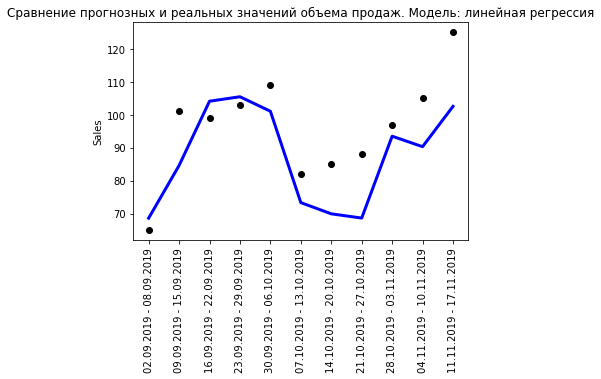

In [160]:
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: линейная регрессия')

In [161]:
mean_absolute_error(y_test, y_pred)

10.846522397642689

In [162]:
#Очевидно, прогностическая сила простой модели линейной регрессии после добавления новых переменных и изменения прогноза количества 
#запросов увеличилась

In [163]:
#Добавляем регуляризацию

In [164]:
dates

31    02.09.2019 - 08.09.2019
32    09.09.2019 - 15.09.2019
33    16.09.2019 - 22.09.2019
34    23.09.2019 - 29.09.2019
35    30.09.2019 - 06.10.2019
36    07.10.2019 - 13.10.2019
37    14.10.2019 - 20.10.2019
38    21.10.2019 - 27.10.2019
39    28.10.2019 - 03.11.2019
40    04.11.2019 - 10.11.2019
41    11.11.2019 - 17.11.2019
Name: period, dtype: object

Прогнозные значения: 
 [[ 61.62828102]
 [ 96.18130787]
 [100.01359709]
 [103.06845526]
 [106.50554838]
 [ 74.7479725 ]
 [ 71.07587152]
 [ 88.86362189]
 [ 96.19886182]
 [ 85.05593434]
 [101.84473099]]
Коэффициенты: 
 [[-6.15022951e-04  5.66750476e-04  2.46275231e-09  3.23682353e-03
   7.94299932e-04  4.52405368e-03 -5.11355360e+00 -3.36791270e+00]]
Средняя абсолютная ошибка:  7.064287799700759
Лучшая альфа:  0.12328467394420685


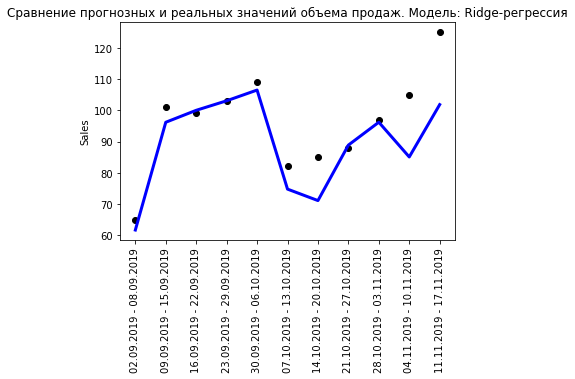

In [165]:
y_pred = choice(Ridge)
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: Ridge-регрессия')

Прогнозные значения: 
 [ 62.29803548  90.07931247 101.71554745 104.12633747 105.43323236
  72.77312331  67.49343111  78.88359208  95.36452633  86.8071683
 101.74521453]
Коэффициенты: 
 [-7.22187390e-04  1.17250142e-03  0.00000000e+00  3.40909042e-03
 -1.32677211e-03  6.35552277e-03 -6.87581162e+00 -3.25848394e+00]
Средняя абсолютная ошибка:  9.08765899383958
Лучшая альфа:  0.030538555088334123


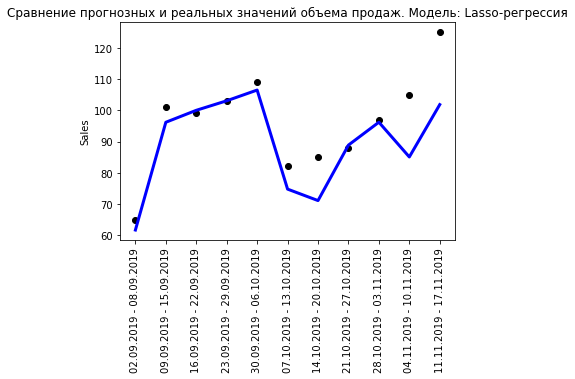

In [166]:
choice(Lasso)
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: Lasso-регрессия')

In [167]:
#Наименьшую ошибку дает L2 резуляризация. Ошибка снизилась до 7. На ее основе и осуществляем конечный прогноз

In [168]:
x_pred = dom.loc[42:, ['mid_price', 'mid_price_competitor', 'comp_sq','demand', 'demand_1', 'demand_2', 'spring', 'holiday']]

In [169]:
x_pred

,mid_price,mid_price_competitor,comp_sq,demand,demand_1,demand_2,spring,holiday
42,106651.70,96013.79,9.218648e+09,10475.0,10929.0,11138.0,0,0
43,101673.50,102984.40,1.060579e+10,9432.0,10475.0,10929.0,0,0
44,123099.70,103358.10,1.068290e+10,10360.0,9432.0,10475.0,0,0
45,119102.70,125948.50,1.586302e+10,11165.0,10360.0,9432.0,0,0
46,101896.10,91143.04,8.307054e+09,11716.0,11165.0,10360.0,0,0
47,124413.50,107045.30,1.145870e+10,11873.0,11716.0,11165.0,0,0
48,125538.70,110561.70,1.222389e+10,11465.0,11873.0,11716.0,0,5
49,111693.30,110301.80,1.216649e+10,12504.0,11465.0,11873.0,0,3
50,112086.90,95005.36,9.026018e+09,11853.0,12504.0,11465.0,0,0
51,85283.17,103556.00,1.072385e+10,11562.0,11853.0,12504.0,0,0


In [170]:
final_model = Ridge(alpha = 0.12328467394420685, normalize = True)
final_model.fit(x_train, y_train)             
pred = final_model.predict(x_pred)

In [171]:
dates = df.loc[42:, 'period']

In [172]:
predict = pd.DataFrame(np.column_stack([dates, pred]))
predict.columns = ['period', 'pred']
print(predict)

                    period     pred
0  20.07.2020 - 26.07.2020  82.4261
1  27.07.2020 - 02.08.2020  88.1724
2  03.08.2020 - 09.08.2020  75.5179
3  10.08.2020 - 16.08.2020  102.161
4  17.08.2020 - 23.08.2020    81.03
5  24.08.2020 - 30.08.2020  88.5433
6  31.08.2020 - 06.09.2020   76.186
7  07.09.2020 - 13.09.2020  94.8976
8  14.09.2020 - 20.09.2020  85.2281
9  21.09.2020 - 27.09.2020  113.982


In [173]:
'''Стоит отметить,что не стоит сильно полагаться на данный прогноз ввиду двух главных причин: маленькому набору данных и разразившемуся 
в 2020 году коронавирусу. Поскольку подобное событие случается раз в сотню лет, у нас нет данных, чтобы оценить его влияние на 
туристический бизнес. Однако известно, что в 2020 году туристический бизнес сильно пострадал от пандемии, поскольку границы были и остаются 
закрыты. На основе этого можно сделать вывод, что реальные цифры оказались существенно ниже, если не близки к нулю.'''

'Стоит отметить,что не стоит сильно полагаться на данный прогноз ввиду двух главных причин: маленькому набору данных и разразившемуся \nв 2020 году коронавирусу. Поскольку подобное событие случается раз в сотню лет, у нас нет данных, чтобы оценить его влияние на \nтуристический бизнес. Однако известно, что в 2020 году туристический бизнес сильно пострадал от пандемии, поскольку границы были и остаются \nзакрыты. На основе этого можно сделать вывод, что реальные цифры оказались существенно ниже, если не близки к нулю.'